<a href="https://colab.research.google.com/github/anncipher/Data_Science_Nigeria_Projects/blob/main/DSN_SUPERVISED_MACHINE_LEARNING_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Downloads/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Split the dataset into feature (X) and target (y) and transform into numpy array

X = data[['YearsExperience']]
y = data['Salary']

# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 1. What linear regression equation best estimates Salary based on YearsExperience

In [ ]:
# Uisng Sklearn, train the model and generate the regression equation
# Fitting Simple Linear Regression to the Dataset

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
# Coefficient of determination

regressor.score(X, y)

0.9569566641435086

In [ ]:
# Intercept b0

print(regressor.intercept_)

25792.20019866871


In [ ]:
# Coefficient or slope of regression

regressor.coef_

array([9449.96232146])

In [ ]:
# Checking correlation between variables

cor = data.corr()
print(cor)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


### Answer: The Linear Regression equation that best estimates is Predicted Salary (yhat) = 9449.96X + 25792.20

## 2. What new value of y will the linear regression equation suggest in line with 20% split of the previous salary?


In [ ]:
# Predicting the Data

y_pred = regressor.predict(X)


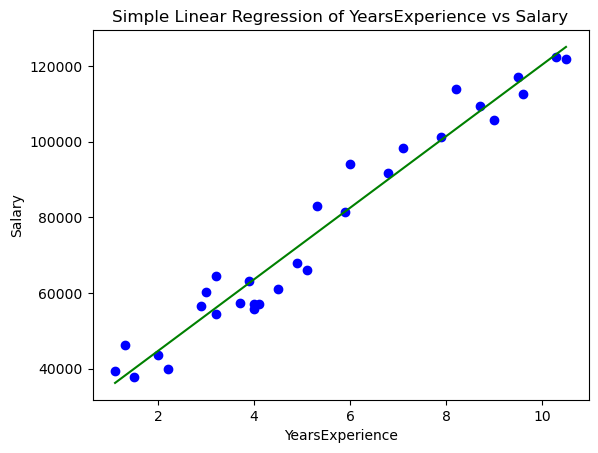

In [ ]:
# Visualizing results using a scatterplot of X on y data

plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'green')


# Also draw a line plot of X against predicted y

plt.title('Simple Linear Regression of YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Adding the result column to the existing data table

data['yhat'] = y_pred
data

,YearsExperience,Salary,yhat,Predicted Salary
0,1.1,39343.0,36187.158752,36187.158752
1,1.3,46205.0,38077.151217,38077.151217
2,1.5,37731.0,39967.143681,39967.143681
3,2.0,43525.0,44692.124842,44692.124842
4,2.2,39891.0,46582.117306,46582.117306
5,2.9,56642.0,53197.090931,53197.090931
6,3.0,60150.0,54142.087163,54142.087163
7,3.2,54445.0,56032.079627,56032.079627
8,3.2,64445.0,56032.079627,56032.079627
9,3.7,57189.0,60757.060788,60757.060788


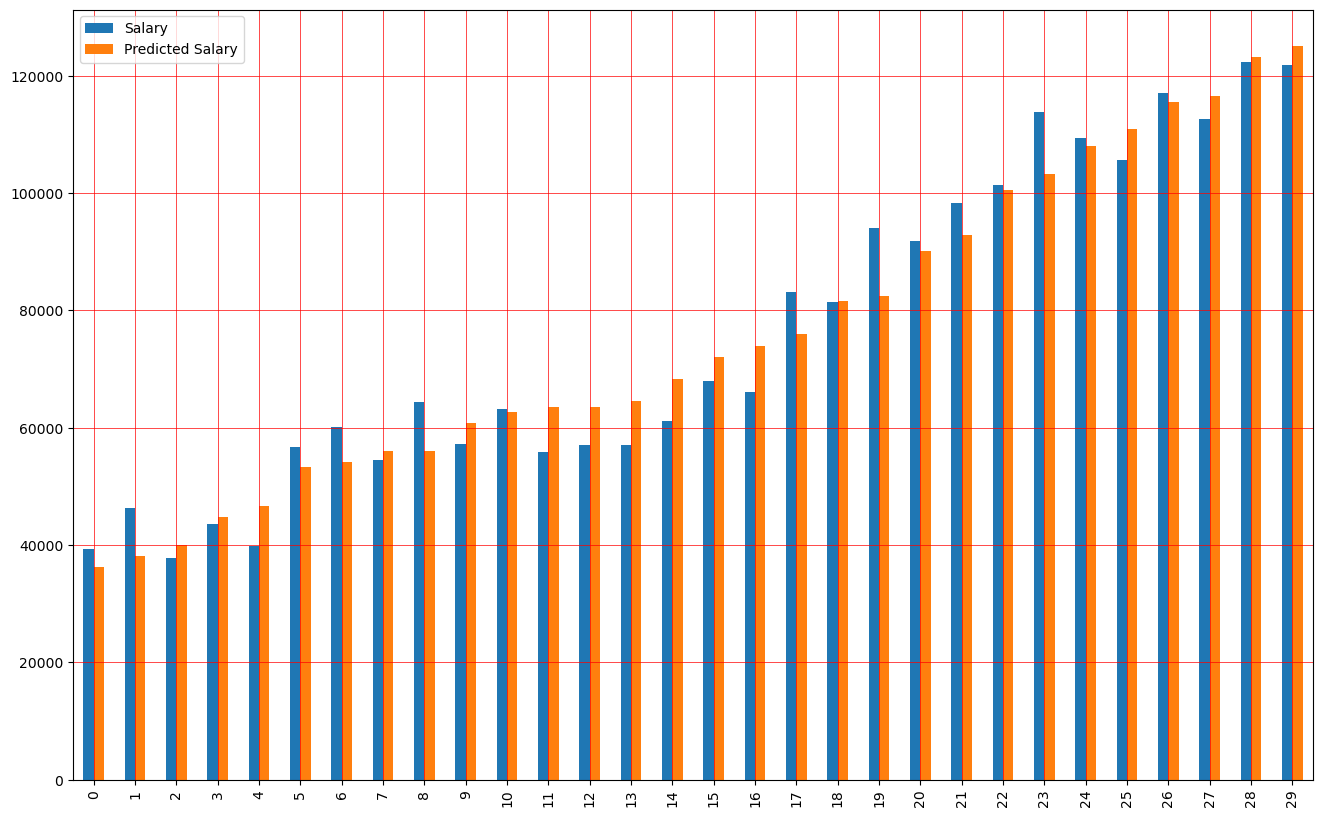

In [ ]:
# A bar plot showing the difference between Actual Salary (y) and Predicted Salary (yhat)

data[['Salary', 'Predicted Salary']].plot(kind = 'bar', figsize = (16,10))

plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'red')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

## 3. How well does the regression equation fit the data?

In [ ]:
# Slicing out the Actual Salary (y) and Predicted Salary (yhat)

result = data[['Salary', 'Predicted Salary']]

In [ ]:
# Creating a column in the result to store mean errors from all observations

n = len(data)

# Error from each prediction

result['error'] = data['Salary'].subtract(data['Predicted Salary'])

print(result)

# Calculating Root Mean Square error: rsme

mse = np.mean((data['Predicted Salary'] - data['Salary']) ** 2)

# Summation of all error function from all predictions

cost_function = abs(result['error']).sum()
Mean_Absolute_Error = cost_function / n
Root_Mean_Squared_Error = np.sqrt(mse)

print()
print(cost_function)
print(Mean_Absolute_Error)
print(Root_Mean_Squared_Error)

      Salary  Predicted Salary         error
0    39343.0      36187.158752   3155.841248
1    46205.0      38077.151217   8127.848783
2    37731.0      39967.143681  -2236.143681
3    43525.0      44692.124842  -1167.124842
4    39891.0      46582.117306  -6691.117306
5    56642.0      53197.090931   3444.909069
6    60150.0      54142.087163   6007.912837
7    54445.0      56032.079627  -1587.079627
8    64445.0      56032.079627   8412.920373
9    57189.0      60757.060788  -3568.060788
10   63218.0      62647.053252    570.946748
11   55794.0      63592.049484  -7798.049484
12   56957.0      63592.049484  -6635.049484
13   57081.0      64537.045717  -7456.045717
14   61111.0      68317.030645  -7206.030645
15   67938.0      72097.015574  -4159.015574
16   66029.0      73987.008038  -7958.008038
17   83088.0      75877.000502   7210.999498
18   81363.0      81546.977895   -183.977895
19   93940.0      82491.974127  11448.025873
20   91738.0      90051.943985   1686.056015
21   98273

C:\Users\DELL\AppData\Local\Temp\ipykernel_6644\989008734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['error'] = data['Salary'].subtract(data['Predicted Salary'])


### Using Engineered Features

1. Using Income Category [Interquartile Ranges] based on Salary earned

In [ ]:
data['Income Category'] = pd.qcut(data['Salary'], 3, labels = ['Low', 'Average', 'High'])
data.head()

,YearsExperience,Salary,yhat,Predicted Salary,Income Category
0,1.1,39343.0,36187.158752,36187.158752,Low
1,1.3,46205.0,38077.151217,38077.151217,Low
2,1.5,37731.0,39967.143681,39967.143681,Low
3,2.0,43525.0,44692.124842,44692.124842,Low
4,2.2,39891.0,46582.117306,46582.117306,Low


2. Using Skills Category

Novice[0-2], Intermediate[3-5], Expert[6-11]

In [ ]:
# Using Skills Category

data['Skills Category'] = ['Novice' if 0 < experience < 3 else 'Intermediate' if 2 < experience < 6 else 'Expert' if 5 < experience < 12 else None
 for experience in list(data['YearsExperience'].values)]
data

,YearsExperience,Salary,yhat,Predicted Salary,Income Category,Skills Category
0,1.1,39343.0,36187.158752,36187.158752,Low,Novice
1,1.3,46205.0,38077.151217,38077.151217,Low,Novice
2,1.5,37731.0,39967.143681,39967.143681,Low,Novice
3,2.0,43525.0,44692.124842,44692.124842,Low,Novice
4,2.2,39891.0,46582.117306,46582.117306,Low,Novice
5,2.9,56642.0,53197.090931,53197.090931,Low,Novice
6,3.0,60150.0,54142.087163,54142.087163,Average,Intermediate
7,3.2,54445.0,56032.079627,56032.079627,Low,Intermediate
8,3.2,64445.0,56032.079627,56032.079627,Average,Intermediate
9,3.7,57189.0,60757.060788,60757.060788,Average,Intermediate


# Visualization of new features



In [ ]:
inc_cat = data.groupby('Income Category').count()
ski_cat = data.groupby('Skills Category').count()

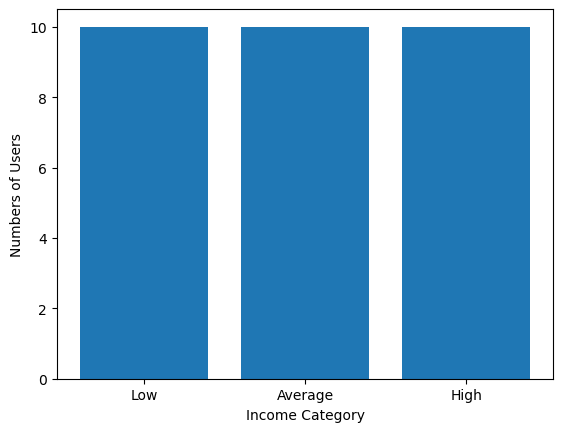

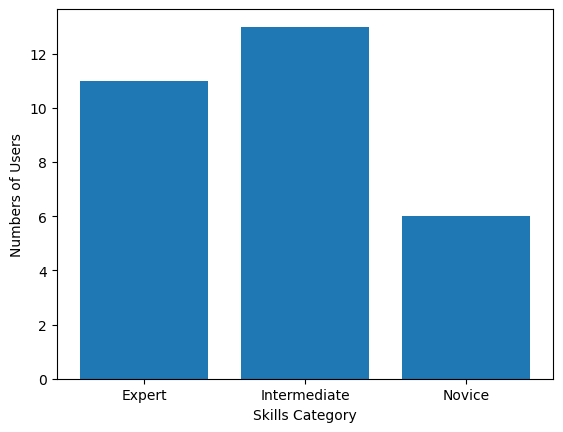

In [ ]:
plt.bar(inc_cat.index.values, inc_cat['Salary'])
plt.ylabel('Numbers of Users')
plt.xlabel('Income Category')
plt.show()

plt.bar(ski_cat.index.values, ski_cat['YearsExperience'])
plt.ylabel('Numbers of Users')
plt.xlabel('Skills Category')
plt.show()